In [112]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
import os

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# Dataset 1

(2000, 2)
(2000,)


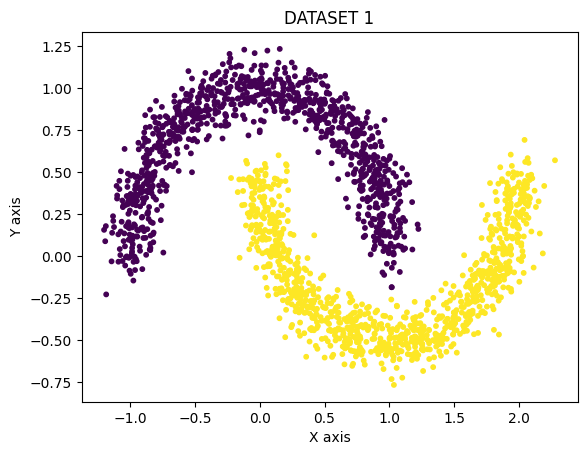

In [113]:
from sklearn import cluster, datasets, mixture
X1,Y1 = datasets.make_moons(n_samples=2000, noise=.09,random_state=10)
print(X1.shape)
print(Y1.shape)
plt.scatter(X1[:, 0], X1[:, 1], s=10, c=Y1)
plt.title('DATASET 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')

plt.show()

# Dataset 2

(2000, 2)
(2000,)


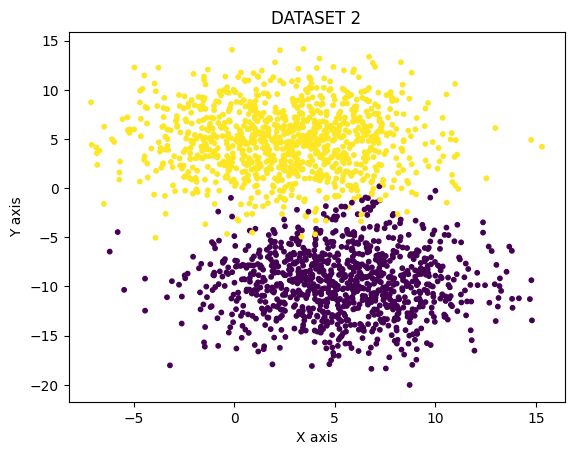

In [114]:
from sklearn.datasets import make_blobs
X3,Y3  = make_blobs(n_samples=2000,cluster_std=3.5,centers=2, n_features=2,random_state=10)
print(X3.shape)
print(Y3.shape)
plt.title('DATASET 2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.scatter(X3[:, 0], X3[:, 1], s=10, c=Y3)
plt.show()

## Applying on Data 1

In [115]:
# combining dataset 1 into a dataframe
df = pd.DataFrame(X1)
df.head()

,0,1
0,0.935740,0.396369
1,1.769521,-0.190208
2,0.784924,-0.555567
3,1.124466,0.424070
4,-0.033015,0.236456


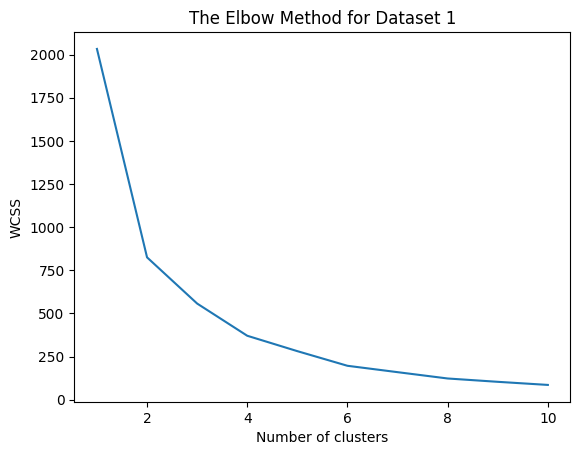

In [116]:
# finding the optimal number of clusters using elbow method
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method for Dataset 1')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [117]:
# optimal number of clusters for BIRCH
from sklearn.cluster import Birch
brc = Birch(branching_factor=20, n_clusters=None, threshold=1.5)
brc.fit(df)
brc.predict(df)
labels = brc.labels_
print(labels)
print(len(labels))
print(len(set(labels)))

[0 0 0 ... 0 0 0]
2000
1


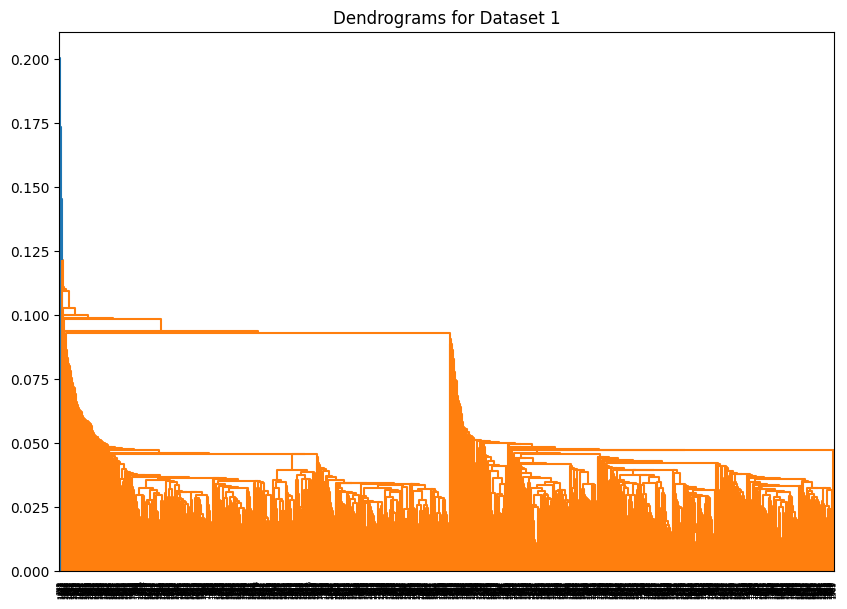

In [118]:
# dendrogram with optimal number of clusters
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 7))
plt.title("Dendrograms for Dataset 1")
dend = dendrogram(linkage(df, method = 'single'))
plt.axhline(y=1.5, color='r', linestyle='--')
plt.show()

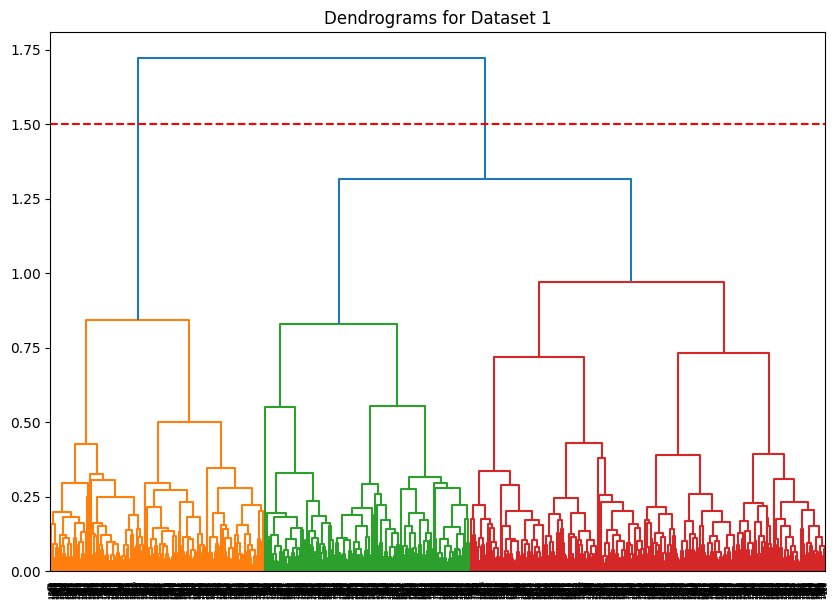

In [119]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 7))
plt.title("Dendrograms for Dataset 1")
dend = dendrogram(linkage(df, method = 'average'))
plt.axhline(y=1.5, color='r', linestyle='--')
plt.show()

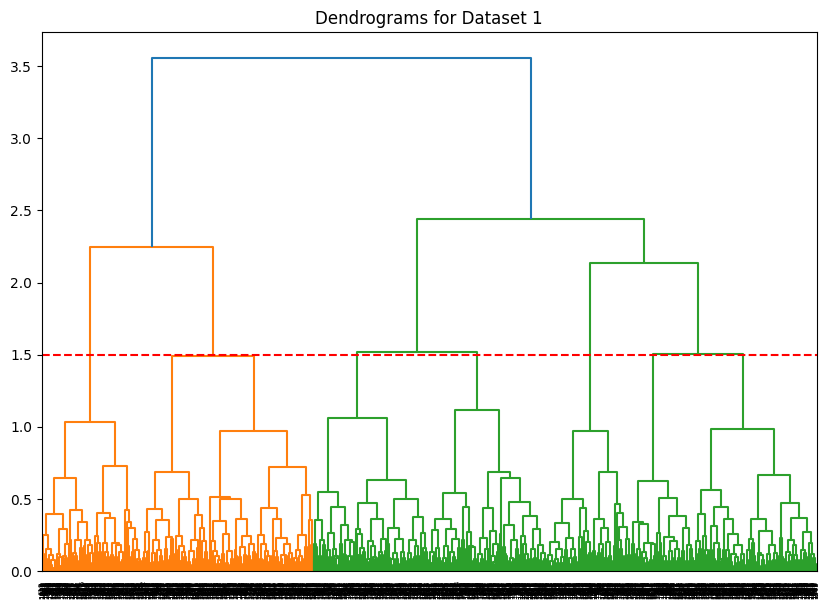

In [120]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 7))
plt.title("Dendrograms for Dataset 1")
dend = dendrogram(linkage(df, method = 'complete'))
plt.axhline(y=1.5, color='r', linestyle='--')
plt.show()

### Implementing Algorithms

[0 0 0 ... 1 1 0]


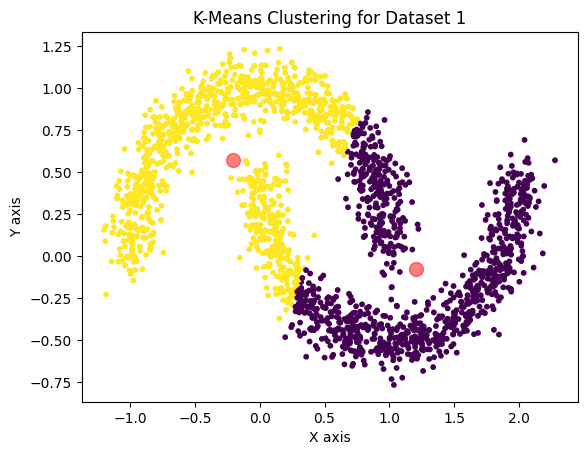

In [121]:
# implementing k-means for 2 clusters
kmeans = KMeans(n_clusters=2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)
print(y_kmeans)

# plotting the clusters
plt.scatter(df[0], df[1], c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
plt.title('K-Means Clustering for Dataset 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

[0 0 0 ... 0 0 0]
2000


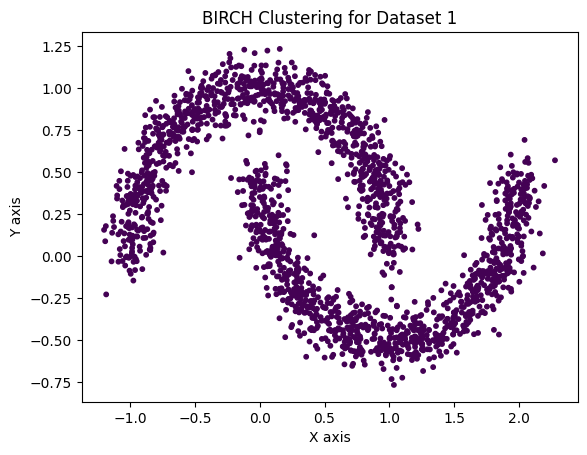

In [122]:
# implementing BIRCH for 2 clusters
brc = Birch(branching_factor=20, n_clusters=2, threshold=1.5)
brc.fit(df)
brc.predict(df)
labels = brc.labels_
print(labels)
print(len(labels))

# plotting the clusters
plt.scatter(df[0], df[1], c=labels, s=10, cmap='viridis')
plt.title('BIRCH Clustering for Dataset 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

[0 0 0 ... 0 0 0]


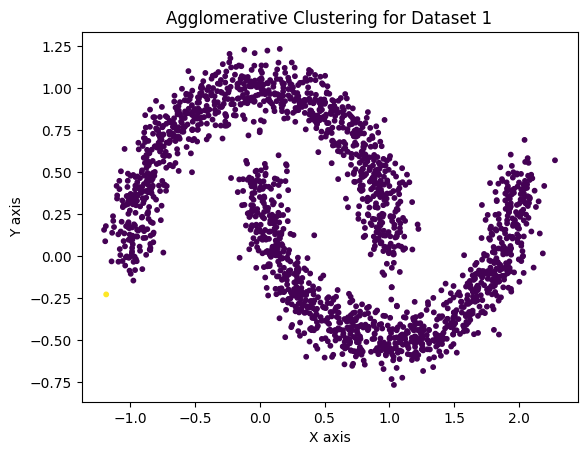

In [123]:
# agglomerative clustering for 2 clusters with single linkage
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='single')
y_hc=hc.fit_predict(df)
print(y_hc)

# plotting the clusters
plt.scatter(df[0], df[1], c=y_hc, s=10, cmap='viridis')
plt.title('Agglomerative Clustering for Dataset 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

[0 1 0 ... 0 0 0]


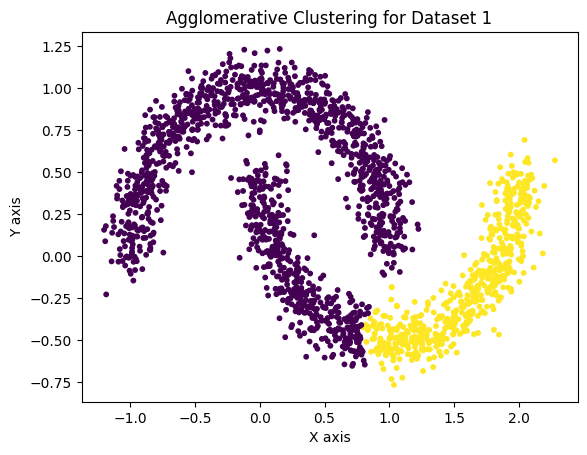

In [124]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='average')
y_hc=hc.fit_predict(df)
print(y_hc)

# plotting the clusters
plt.scatter(df[0], df[1], c=y_hc, s=10, cmap='viridis')
plt.title('Agglomerative Clustering for Dataset 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

[0 1 1 ... 0 0 1]


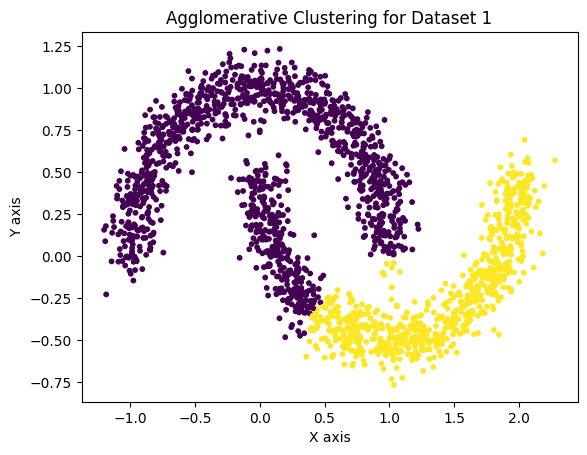

In [125]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='complete')
y_hc=hc.fit_predict(df)
print(y_hc)

# plotting the clusters
plt.scatter(df[0], df[1], c=y_hc, s=10, cmap='viridis')
plt.title('Agglomerative Clustering for Dataset 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

[0 1 1 ... 0 1 1]


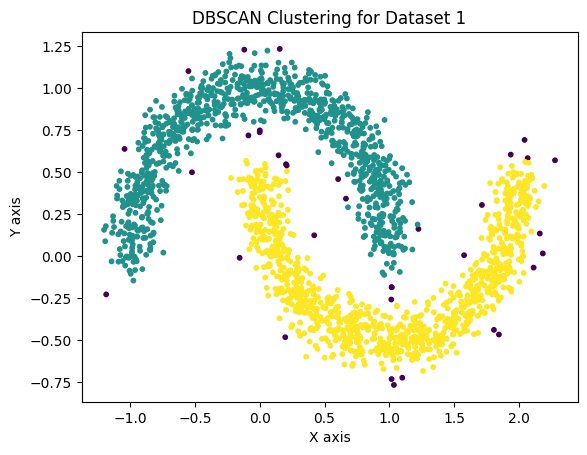

In [126]:
# implementing DBSCAN for 2 clusters
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.1, min_samples=10).fit(df)
labels = db.labels_
print(labels)

# plotting the clusters
plt.scatter(df[0], df[1], c=labels, s=10, cmap='viridis')
plt.title('DBSCAN Clustering for Dataset 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

### implementing K-medoids

In [127]:
# converting dataframe to list
X1 = df.values.tolist()
X1

def k_med_helper(X1, c1, c2):
    sum = 0

    for i in range(len(X1)):
        sum = sum + min(abs(X1[i][0]-c1[0])+abs(X1[i][1]-c1[1]),abs(X1[i][0]-c2[0])+abs(X1[i][1]-c2[1]))

    return(sum)

In [128]:
# min_c1 = 0
# min_c2 = 0
# min_sum = 100000000
# for i in range(len(X1)):
#     for j in range(len(X1)):
#         if i!=j:
#             c1 = X1[i]
#             c2 = X1[j]
#             sum = k_med_helper(X1, c1, c2)
#             if sum < min_sum:
#                 min_sum = sum
#                 min_c1 = c1
#                 min_c2 = c2

# print(min_c1)
# print(min_c2)

## Applying on Data 2

In [129]:
# combining dataset 1 into a dataframe
df = pd.DataFrame(X3)
df.head()

,0,1
0,5.195945,-17.045953
1,6.044000,1.752762
2,2.479504,-6.462165
3,3.830156,10.171374
4,6.355246,5.043249


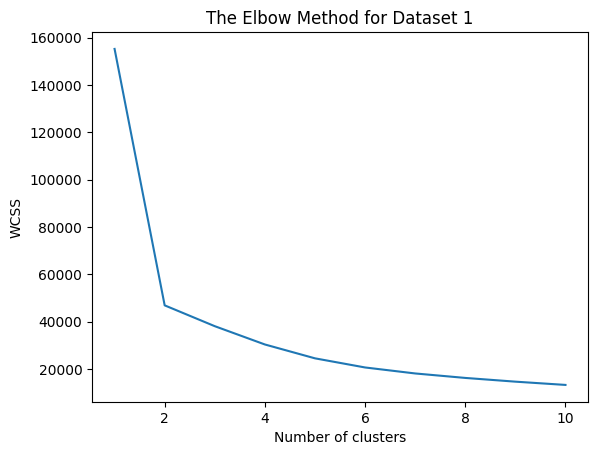

In [130]:
# finding the optimal number of clusters using elbow method
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method for Dataset 1')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [131]:
# optimal number of clusters for BIRCH
from sklearn.cluster import Birch
brc = Birch(branching_factor=20, n_clusters=None, threshold=1.5)
brc.fit(df)
brc.predict(df)
labels = brc.labels_
print(labels)
print(len(labels))
print(len(set(labels)))

[11 32  1 ... 22 34  2]
2000
66


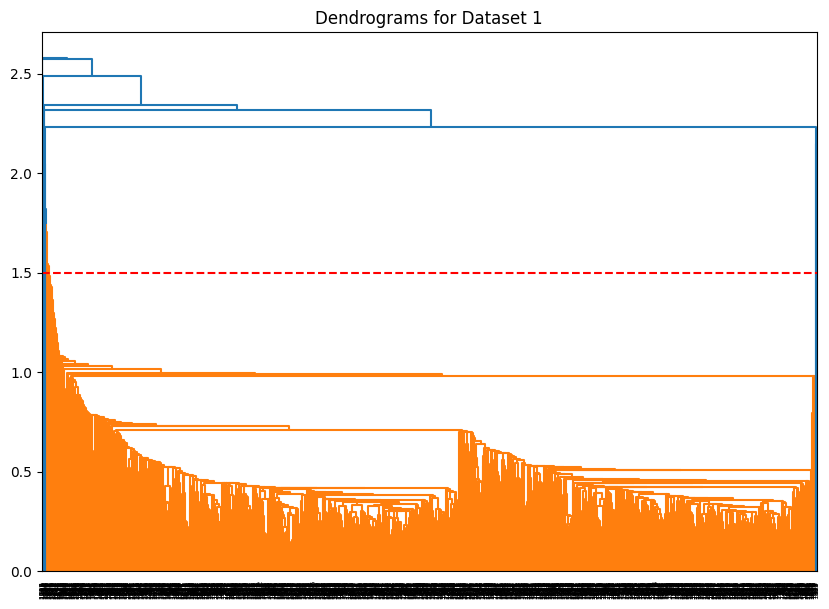

In [132]:
# dendrogram with optimal number of clusters
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 7))
plt.title("Dendrograms for Dataset 1")
dend = dendrogram(linkage(df, method = 'single'))
plt.axhline(y=1.5, color='r', linestyle='--')
plt.show()

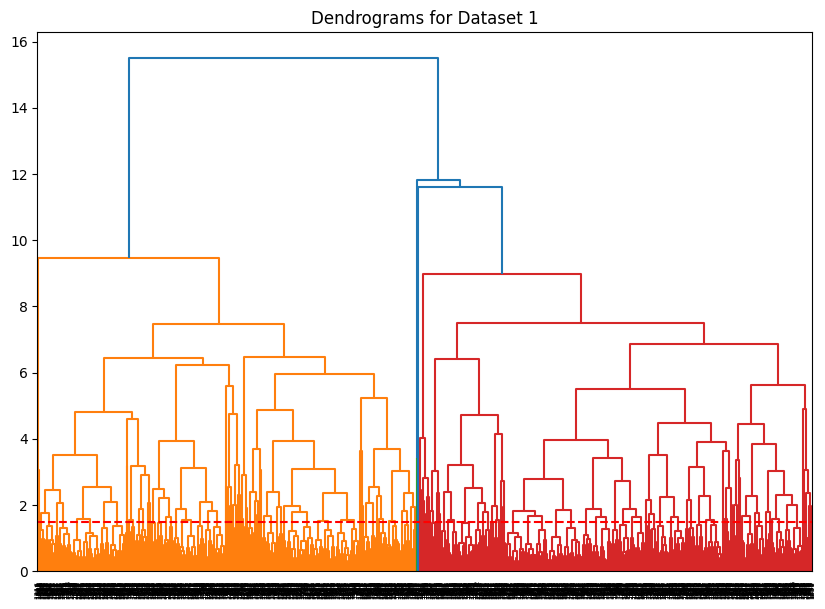

In [133]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 7))
plt.title("Dendrograms for Dataset 1")
dend = dendrogram(linkage(df, method = 'average'))
plt.axhline(y=1.5, color='r', linestyle='--')
plt.show()

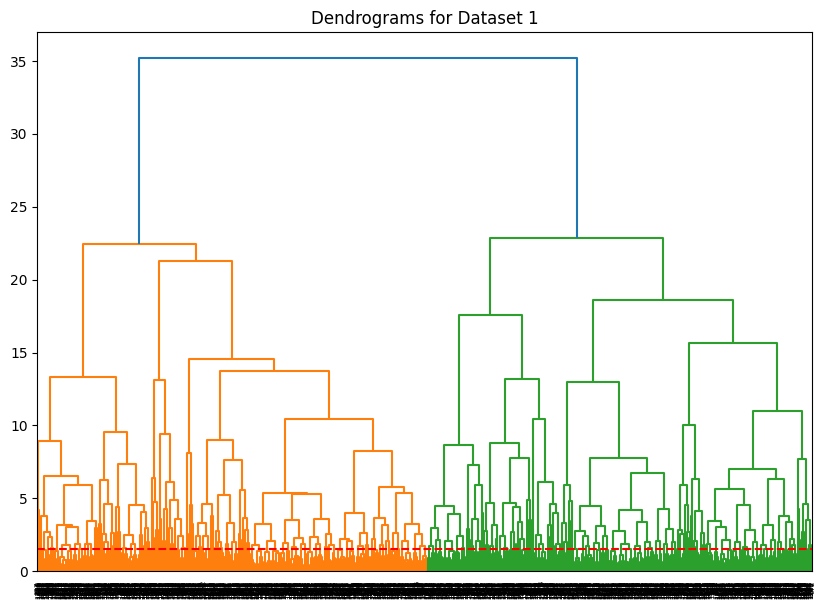

In [134]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 7))
plt.title("Dendrograms for Dataset 1")
dend = dendrogram(linkage(df, method = 'complete'))
plt.axhline(y=1.5, color='r', linestyle='--')
plt.show()

### Implementing Algorithms

[1 0 1 ... 1 0 1]


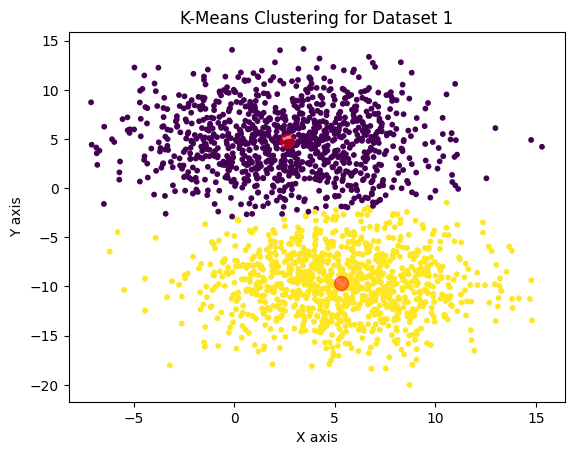

In [135]:
# implementing k-means for 2 clusters
kmeans = KMeans(n_clusters=2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)
print(y_kmeans)

# plotting the clusters
plt.scatter(df[0], df[1], c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
plt.title('K-Means Clustering for Dataset 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

[0 0 0 ... 0 1 0]
2000


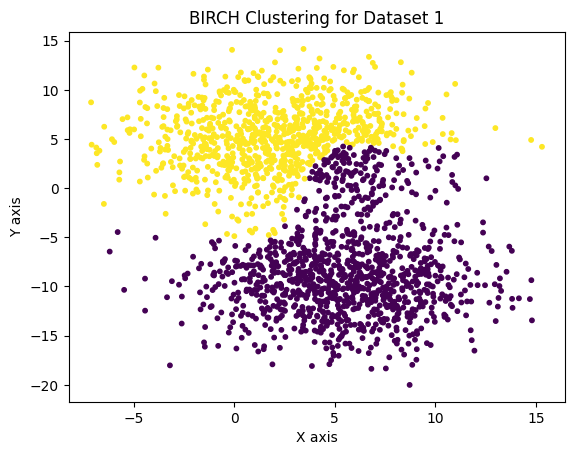

In [136]:
# implementing BIRCH for 2 clusters
brc = Birch(branching_factor=20, n_clusters=2, threshold=1.5)
brc.fit(df)
brc.predict(df)
labels = brc.labels_
print(labels)
print(len(labels))

# plotting the clusters
plt.scatter(df[0], df[1], c=labels, s=10, cmap='viridis')
plt.title('BIRCH Clustering for Dataset 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

[0 0 0 ... 0 0 0]


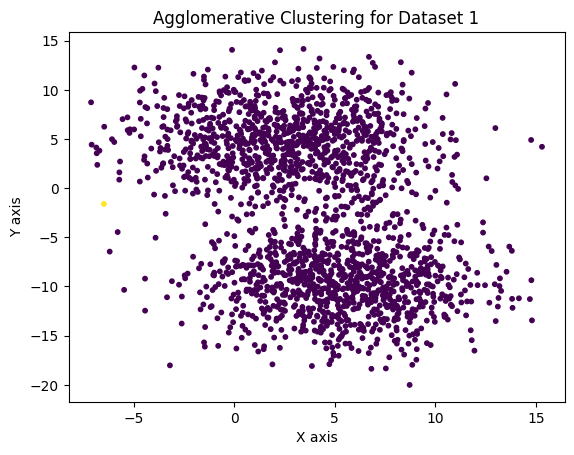

In [137]:
# agglomerative clustering for 2 clusters with single linkage
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='single')
y_hc=hc.fit_predict(df)
print(y_hc)

# plotting the clusters
plt.scatter(df[0], df[1], c=y_hc, s=10, cmap='viridis')
plt.title('Agglomerative Clustering for Dataset 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

[0 1 0 ... 0 1 0]


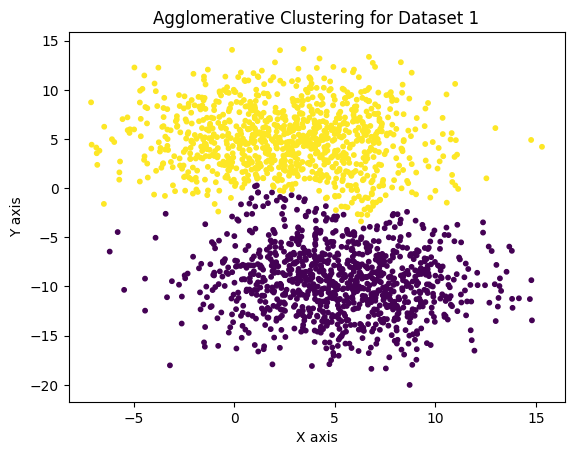

In [138]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='average')
y_hc=hc.fit_predict(df)
print(y_hc)

# plotting the clusters
plt.scatter(df[0], df[1], c=y_hc, s=10, cmap='viridis')
plt.title('Agglomerative Clustering for Dataset 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

[1 0 1 ... 1 0 1]


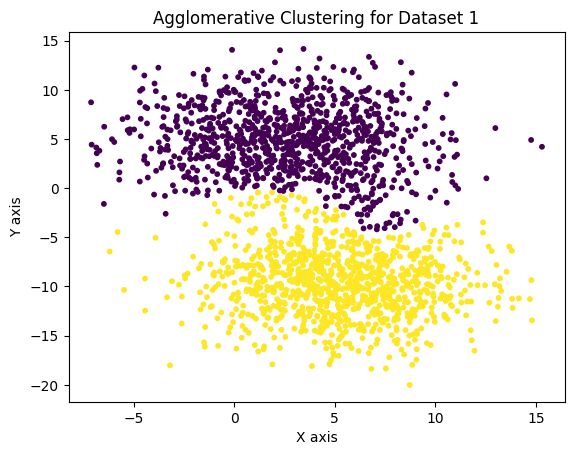

In [139]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='complete')
y_hc=hc.fit_predict(df)
print(y_hc)

# plotting the clusters
plt.scatter(df[0], df[1], c=y_hc, s=10, cmap='viridis')
plt.title('Agglomerative Clustering for Dataset 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

[-1 -1 -1 ... -1 -1 -1]


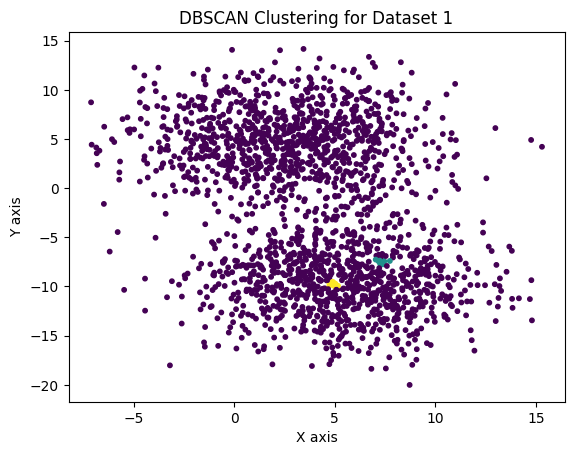

In [140]:
# implementing DBSCAN for 2 clusters
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(df)
labels = db.labels_
print(labels)

# plotting the clusters
plt.scatter(df[0], df[1], c=labels, s=10, cmap='viridis')
plt.title('DBSCAN Clustering for Dataset 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

### implementing K-medoids

In [141]:
# converting dataframe to list
X1 = df.values.tolist()
X1

def k_med_helper(X1, c1, c2):
    sum = 0

    for i in range(len(X1)):
        sum = sum + min(abs(X1[i][0]-c1[0])+abs(X1[i][1]-c1[1]),abs(X1[i][0]-c2[0])+abs(X1[i][1]-c2[1]))

    return(sum)

In [142]:
# min_c1 = 0
# min_c2 = 0
# min_sum = 100000000
# for i in range(len(X1)):
#     for j in range(len(X1)):
#         if i!=j:
#             c1 = X1[i]
#             c2 = X1[j]
#             sum = k_med_helper(X1, c1, c2)
#             if sum < min_sum:
#                 min_sum = sum
#                 min_c1 = c1
#                 min_c2 = c2

# print(min_c1)
# print(min_c2)